In [4]:
def selection_sort_steps(arr):
    """
    Perform selection sort and print each step.
    """
    n = len(arr)
    print(f"Initial array: {arr}\n")

    for i in range(n):
        min_idx = i
        print(f"Step {i + 1}:")
        print(f"  Starting index {i}, current value: {arr[i]}")

        for j in range(i + 1, n):
            print(f"    Comparing {arr[j]} (index {j}) with current min {arr[min_idx]} (index {min_idx})")
            if arr[j] < arr[min_idx]:
                min_idx = j
                print(f"    → New minimum found: {arr[min_idx]} at index {min_idx}")

        if i != min_idx:
            print(f"  Swapping {arr[i]} and {arr[min_idx]}")
            arr[i], arr[min_idx] = arr[min_idx], arr[i]
        else:
            print(f"  No swap needed")

        print(f"  Array after step {i + 1}: {arr}\n")

    print(f"Sorted array: {arr}")
    return arr

# Input from user
arr = list(map(int, input("Enter the array to sort (space separated): ").split()))
selection_sort_steps(arr)


Enter the array to sort (space separated):  4 6 3 1 9 7 


Initial array: [4, 6, 3, 1, 9, 7]

Step 1:
  Starting index 0, current value: 4
    Comparing 6 (index 1) with current min 4 (index 0)
    Comparing 3 (index 2) with current min 4 (index 0)
    → New minimum found: 3 at index 2
    Comparing 1 (index 3) with current min 3 (index 2)
    → New minimum found: 1 at index 3
    Comparing 9 (index 4) with current min 1 (index 3)
    Comparing 7 (index 5) with current min 1 (index 3)
  Swapping 4 and 1
  Array after step 1: [1, 6, 3, 4, 9, 7]

Step 2:
  Starting index 1, current value: 6
    Comparing 3 (index 2) with current min 6 (index 1)
    → New minimum found: 3 at index 2
    Comparing 4 (index 3) with current min 3 (index 2)
    Comparing 9 (index 4) with current min 3 (index 2)
    Comparing 7 (index 5) with current min 3 (index 2)
  Swapping 6 and 3
  Array after step 2: [1, 3, 6, 4, 9, 7]

Step 3:
  Starting index 2, current value: 6
    Comparing 4 (index 3) with current min 6 (index 2)
    → New minimum found: 4 at index 3
    Co

[1, 3, 4, 6, 7, 9]

Enter the number of edges:  7
Enter edge (u v weight):  1 2 3
Enter edge (u v weight):  1 4 9
Enter edge (u v weight):  2 3 7
Enter edge (u v weight):  2 5 10
Enter edge (u v weight):  3 5 6
Enter edge (u v weight):  4 5 4
Enter edge (u v weight):  3 4 8


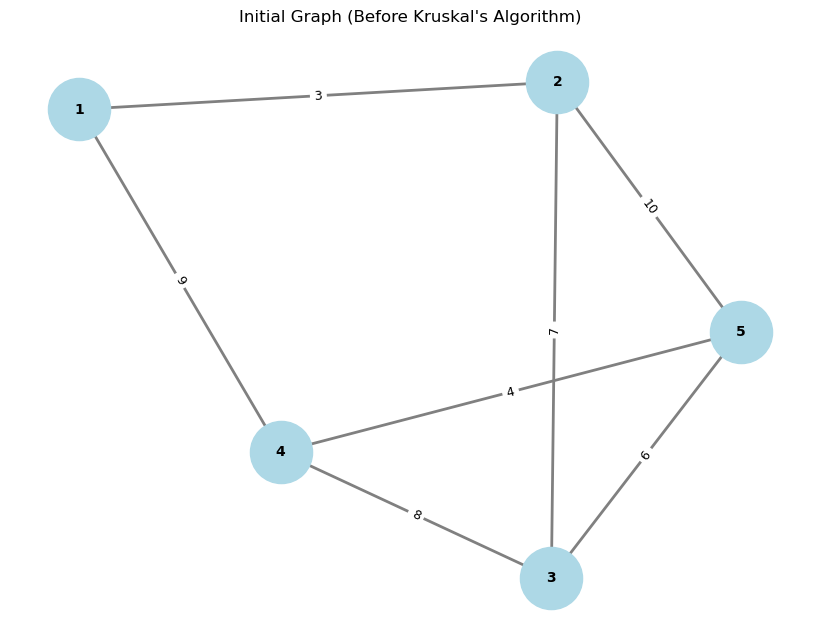


Starting Kruskal's Algorithm...

Step 1: Checking edge (1, 2) with weight 3
   Adding edge (1, 2) to MST

Step 2: Checking edge (4, 5) with weight 4
   Adding edge (4, 5) to MST

Step 3: Checking edge (3, 5) with weight 6
   Adding edge (3, 5) to MST

Step 4: Checking edge (2, 3) with weight 7
   Adding edge (2, 3) to MST

Step 5: Checking edge (4, 3) with weight 8
   Skipping edge (4, 3) to avoid cycle

Step 6: Checking edge (1, 4) with weight 9
   Skipping edge (1, 4) to avoid cycle

Step 7: Checking edge (2, 5) with weight 10
   Skipping edge (2, 5) to avoid cycle

 Minimum Spanning Tree (MST) edges:
  (1, 2) with weight 3
  (4, 5) with weight 4
  (3, 5) with weight 6
  (2, 3) with weight 7

 Total MST Weight: 20



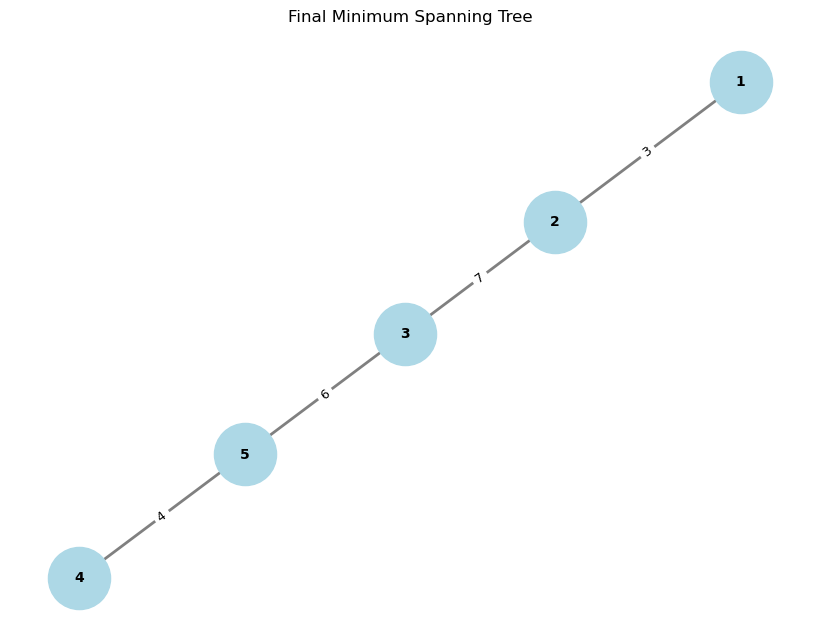

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def kruskal_mst_steps(graph):
    parent = {}
    rank = {}

    def find(u):
        if parent[u] != u:
            parent[u] = find(parent[u])
        return parent[u]

    def union(u, v):
        root_u = find(u)
        root_v = find(v)
        if root_u != root_v:
            if rank[root_u] > rank[root_v]:
                parent[root_v] = root_u
            elif rank[root_u] < rank[root_v]:
                parent[root_u] = root_v
            else:
                parent[root_v] = root_u
                rank[root_u] += 1

    for node in graph.nodes():
        parent[node] = node
        rank[node] = 0

    edges = list(graph.edges(data=True))
    edges.sort(key=lambda x: x[2]['weight'])

    mst_edges = []

    print("\nStarting Kruskal's Algorithm...\n")
    for idx, (u, v, data) in enumerate(edges, 1):
        print(f"Step {idx}: Checking edge ({u}, {v}) with weight {data['weight']}")
        if find(u) != find(v):
            print(f"   Adding edge ({u}, {v}) to MST")
            mst_edges.append((u, v, data['weight']))
            union(u, v)
        else:
            print(f"   Skipping edge ({u}, {v}) to avoid cycle")
        print()

    print(" Minimum Spanning Tree (MST) edges:")
    total_weight = 0
    for u, v, w in mst_edges:
        print(f"  ({u}, {v}) with weight {w}")
        total_weight += w
    print(f"\n Total MST Weight: {total_weight}\n")

    return mst_edges

def draw_graph(graph, title):
    pos = nx.spring_layout(graph, seed=42)  # fixed layout
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=2000,
            font_size=10, font_weight='bold', edge_color='gray', width=2)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=9)
    plt.title(title)
    plt.show()

def draw_mst_tree(mst_edges):
    mst_graph = nx.Graph()
    for u, v, w in mst_edges:
        mst_graph.add_edge(u, v, weight=w)
    draw_graph(mst_graph, "Final Minimum Spanning Tree")

def get_user_input():
    graph = nx.Graph()
    num_edges = int(input("Enter the number of edges: "))
    for _ in range(num_edges):
        u, v, weight = input("Enter edge (u v weight): ").split()
        u, v, weight = int(u), int(v), int(weight)
        graph.add_edge(u, v, weight=weight)
    return graph

# MAIN EXECUTION
graph = get_user_input()
draw_graph(graph, "Initial Graph (Before Kruskal's Algorithm)")
mst = kruskal_mst_steps(graph)
draw_mst_tree(mst)


Enter number of edges:  5
Enter edge (u v weight):  1 2 9
Enter edge (u v weight):  1 3 6 
Enter edge (u v weight):  2 4 3
Enter edge (u v weight):  3 4 2
Enter edge (u v weight):  4 5 2
Enter the start node for Prim's Algorithm:  2


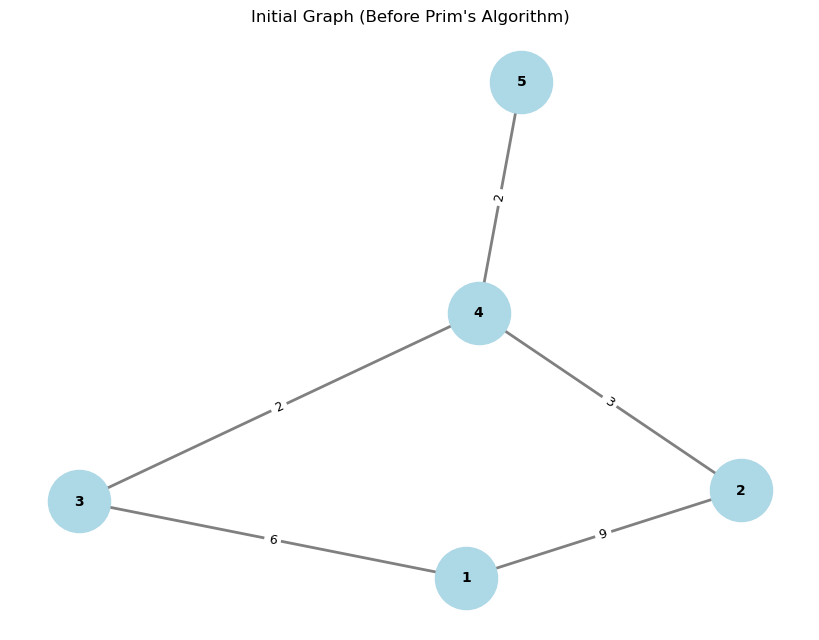


Starting Prim's Algorithm...

Adding edge (2, 4) with weight 3
Adding edge (4, 3) with weight 2
Adding edge (4, 5) with weight 2
Adding edge (3, 1) with weight 6

 Minimum Spanning Tree (MST) edges:
  (2, 4) with weight 3
  (4, 3) with weight 2
  (4, 5) with weight 2
  (3, 1) with weight 6

 Total MST Weight: 13



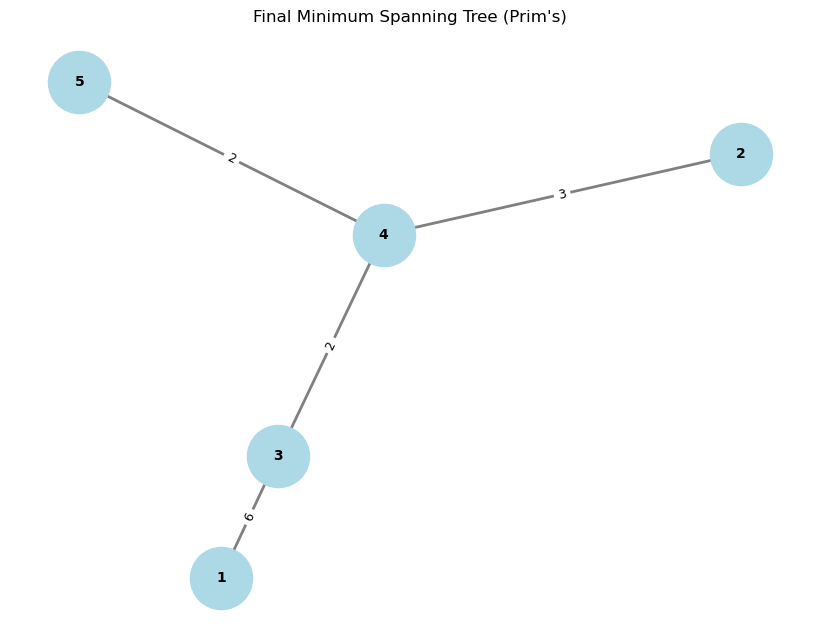

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

def prim_mst_steps(graph, start_node):
    mst_edges = []
    visited = set([start_node])
    all_edges = list(graph.edges(data=True))

    print("\nStarting Prim's Algorithm...\n")
    while len(visited) < len(graph.nodes):
        min_edge = None
        min_weight = float('inf')

        for u, v, data in all_edges:
            if u in visited and v not in visited:
                if data['weight'] < min_weight:
                    min_weight = data['weight']
                    min_edge = (u, v, data['weight'])
            elif v in visited and u not in visited:
                if data['weight'] < min_weight:
                    min_weight = data['weight']
                    min_edge = (v, u, data['weight'])

        if min_edge:
            u, v, weight = min_edge
            print(f"Adding edge ({u}, {v}) with weight {weight}")
            mst_edges.append((u, v, weight))
            visited.add(v)
        else:
            print("No valid edges found. Graph may not be connected.")
            break

    print("\n Minimum Spanning Tree (MST) edges:")
    total_weight = 0
    for u, v, w in mst_edges:
        print(f"  ({u}, {v}) with weight {w}")
        total_weight += w
    print(f"\n Total MST Weight: {total_weight}\n")

    return mst_edges

def draw_graph(graph, title):
    pos = nx.spring_layout(graph, seed=42)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=2000,
            font_size=10, font_weight='bold', edge_color='gray', width=2)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=9)
    plt.title(title)
    plt.show()

def draw_mst_tree(mst_edges):
    mst_graph = nx.Graph()
    for u, v, w in mst_edges:
        mst_graph.add_edge(u, v, weight=w)
    draw_graph(mst_graph, "Final Minimum Spanning Tree (Prim's)")

def get_user_input():
    graph = nx.Graph()
    num_edges = int(input("Enter number of edges: "))
    for _ in range(num_edges):
        u, v, weight = map(int, input("Enter edge (u v weight): ").split())
        graph.add_edge(u, v, weight=weight)
    return graph

# MAIN EXECUTION
graph = get_user_input()
start_node = int(input("Enter the start node for Prim's Algorithm: "))

draw_graph(graph, "Initial Graph (Before Prim's Algorithm)")
mst = prim_mst_steps(graph, start_node)
draw_mst_tree(mst)


In [12]:
def job_sequencing(jobs):
    # Sort jobs based on descending profit
    jobs.sort(key=lambda x: x[2], reverse=True)

    # Find the maximum deadline to determine the number of time slots
    max_deadline = max(job[1] for job in jobs)

    # Initialize time slots and total profit
    time_slots = [-1] * max_deadline
    total_profit = 0

    # Iterate through each job
    for job in jobs:
        job_id, deadline, profit = job

        # Find a free time slot for this job (starting from the last possible slot)
        for slot in range(min(deadline, max_deadline) - 1, -1, -1):
            if time_slots[slot] == -1:
                time_slots[slot] = job_id
                total_profit += profit
                break

    # Filter out unassigned slots and prepare the job sequence
    job_sequence = [job_id for job_id in time_slots if job_id != -1]

    return job_sequence, total_profit

# Function to get user input
def get_user_input():
    jobs = []
    num_jobs = int(input("Enter the number of jobs: "))
    for _ in range(num_jobs):
        job_id = input("Enter Job ID: ")
        deadline = int(input(f"Enter deadline for job {job_id}: "))
        profit = int(input(f"Enter profit for job {job_id}: "))
        jobs.append((job_id, deadline, profit))
    return jobs

# Main function
def main():
    jobs = get_user_input()
    sequence, profit = job_sequencing(jobs)
    print(f"\nOptimal job sequence: {sequence}")
    print(f"Total profit: {profit}")

if __name__ == "__main__":
    main()


Enter the number of jobs:  4
Enter Job ID:  A
Enter deadline for job A:  34
Enter profit for job A:  100
Enter Job ID:  C
Enter deadline for job C:  10
Enter profit for job C:  60
Enter Job ID:  B
Enter deadline for job B:  12
Enter profit for job B:  90
Enter Job ID:  E
Enter deadline for job E:  15
Enter profit for job E:  50



Optimal job sequence: ['C', 'B', 'E', 'A']
Total profit: 300
